# Normalization
Normalization is a technique used in feature scaling to bring all the features of a dataset onto the same scale. It is used to make sure that the features with larger values do not dominate over features with smaller values. This is important because some machine learning algorithms, such as gradient descent, can converge faster when the data is on the same scale.

Normalization involves scaling the features to have a mean of 0 and a standard deviation of 1. This is also known as standardization. The formula for standardization is:

z = (x - mean) / standard deviation

Where z is the standardized feature, x is the original feature, mean is the mean of the feature, and standard deviation is the standard deviation of the feature.

Another common normalization technique is min-max scaling. In this technique, the features are scaled to a range between 0 and 1. The formula for min-max scaling is:

x_scaled = (x - min) / (max - min)

Where x_scaled is the scaled feature, x is the original feature, min is the minimum value of the feature, and max is the maximum value of the feature.

Overall, normalization is an important step in preprocessing data for machine learning models. It can improve the accuracy and speed of the training process, and can also help prevent overfitting.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
wine = pd.read_csv(r"C:\Users\DELL\OneDrive\Data Science\Extra topics\wine_dataset.csv",header=None,usecols=[0,1,2])
wine.columns=['Class', 'Alcoholic', 'Acidic']

In [9]:
wine.head()

,Class,Alcoholic,Acidic
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


# Distribution of dataset - Alcholic feature

<AxesSubplot:xlabel='Alcoholic', ylabel='Density'>

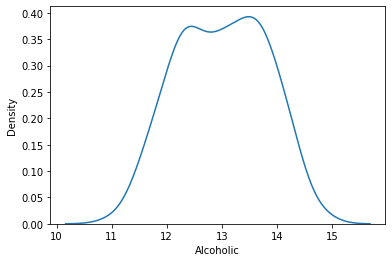

In [10]:
sns.kdeplot(df['Alcoholic'])

<AxesSubplot:xlabel='Acidic', ylabel='Density'>

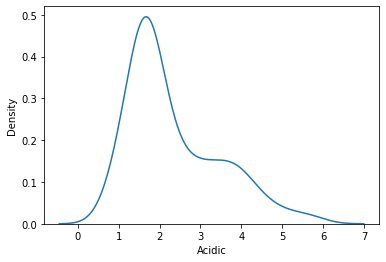

In [11]:
sns.kdeplot(df['Acidic'])

C:\Users\DELL\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Alcoholic', ylabel='Acidic'>

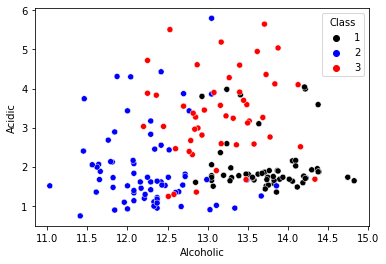

In [15]:
color_dict={1:'black',3:'red',2:'blue'}
sns.scatterplot(df['Alcoholic'],df['Acidic'],hue=df['Class'],palette=color_dict)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class', axis=1),
                                                    df['Class'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((124, 2), (54, 2))

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [19]:
np.round(X_train.describe(), 1)

,Alcoholic,Acidic
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [20]:
np.round(X_train_scaled.describe(), 1)

,Alcoholic,Acidic
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


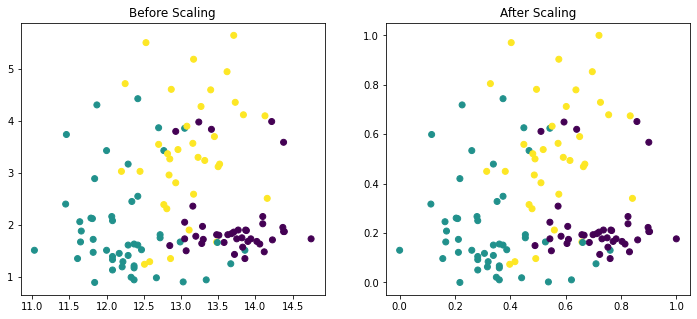

In [21]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Alcoholic'], X_train['Acidic'],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Alcoholic'], X_train_scaled['Acidic'],c=y_train)
ax2.set_title("After Scaling")
plt.show()

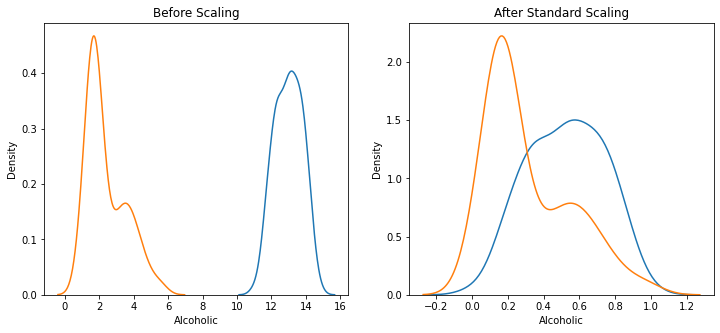

In [23]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcoholic'], ax=ax1)
sns.kdeplot(X_train['Acidic'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcoholic'], ax=ax2)
sns.kdeplot(X_train_scaled['Acidic'], ax=ax2)
plt.show()

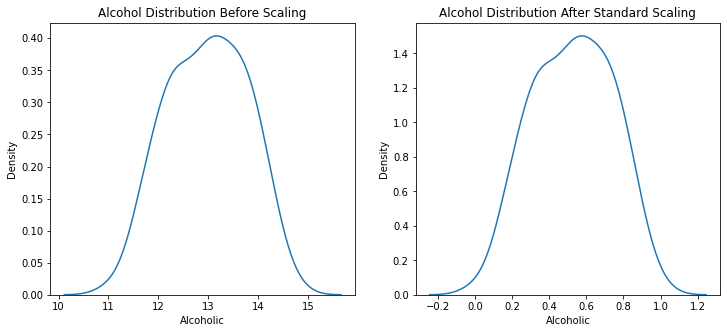

In [24]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Alcohol Distribution Before Scaling')
sns.kdeplot(X_train['Alcoholic'], ax=ax1)

# after scaling
ax2.set_title('Alcohol Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcoholic'], ax=ax2)
plt.show()

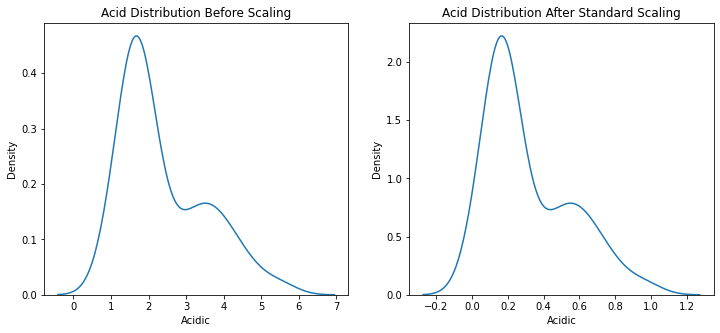

In [25]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Acid Distribution Before Scaling')
sns.kdeplot(X_train['Acidic'], ax=ax1)

# after scaling
ax2.set_title('Acid Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Acidic'], ax=ax2)
plt.show()

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [27]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [28]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [29]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [30]:
print("Actual Accuracy",accuracy_score(y_test,y_pred))
print("Scaled Accuracy",accuracy_score(y_test,y_pred_scaled))

Actual Accuracy 0.7592592592592593
Scaled Accuracy 0.7962962962962963


- We can see improvement in the accuracy after applying scaling 